# Исследование объявлений о продаже квартир
**ОПИСАНИЕ ПРОЕКТА**

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откройте файл с данными и изучите общую информацию

**Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True)

In [2]:
df = pd.read_csv(r"D:\WinUsers\Lenovo\Desktop\ПРОЕКТНЫЕ ФАЙЛЫ.CSV\Спринт_3. Исследовательский анализ\real_estate_data.csv", sep='\t')


**Изучим общую информацию о полученном датафрейме.**

In [3]:
#pd.set_option('max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Проверим есть ли явные дубликаты в датафрейме.**

In [5]:
df.duplicated().sum()

0

**Построим гистограмму для всех числовых столбцов таблицы на одном графике.**

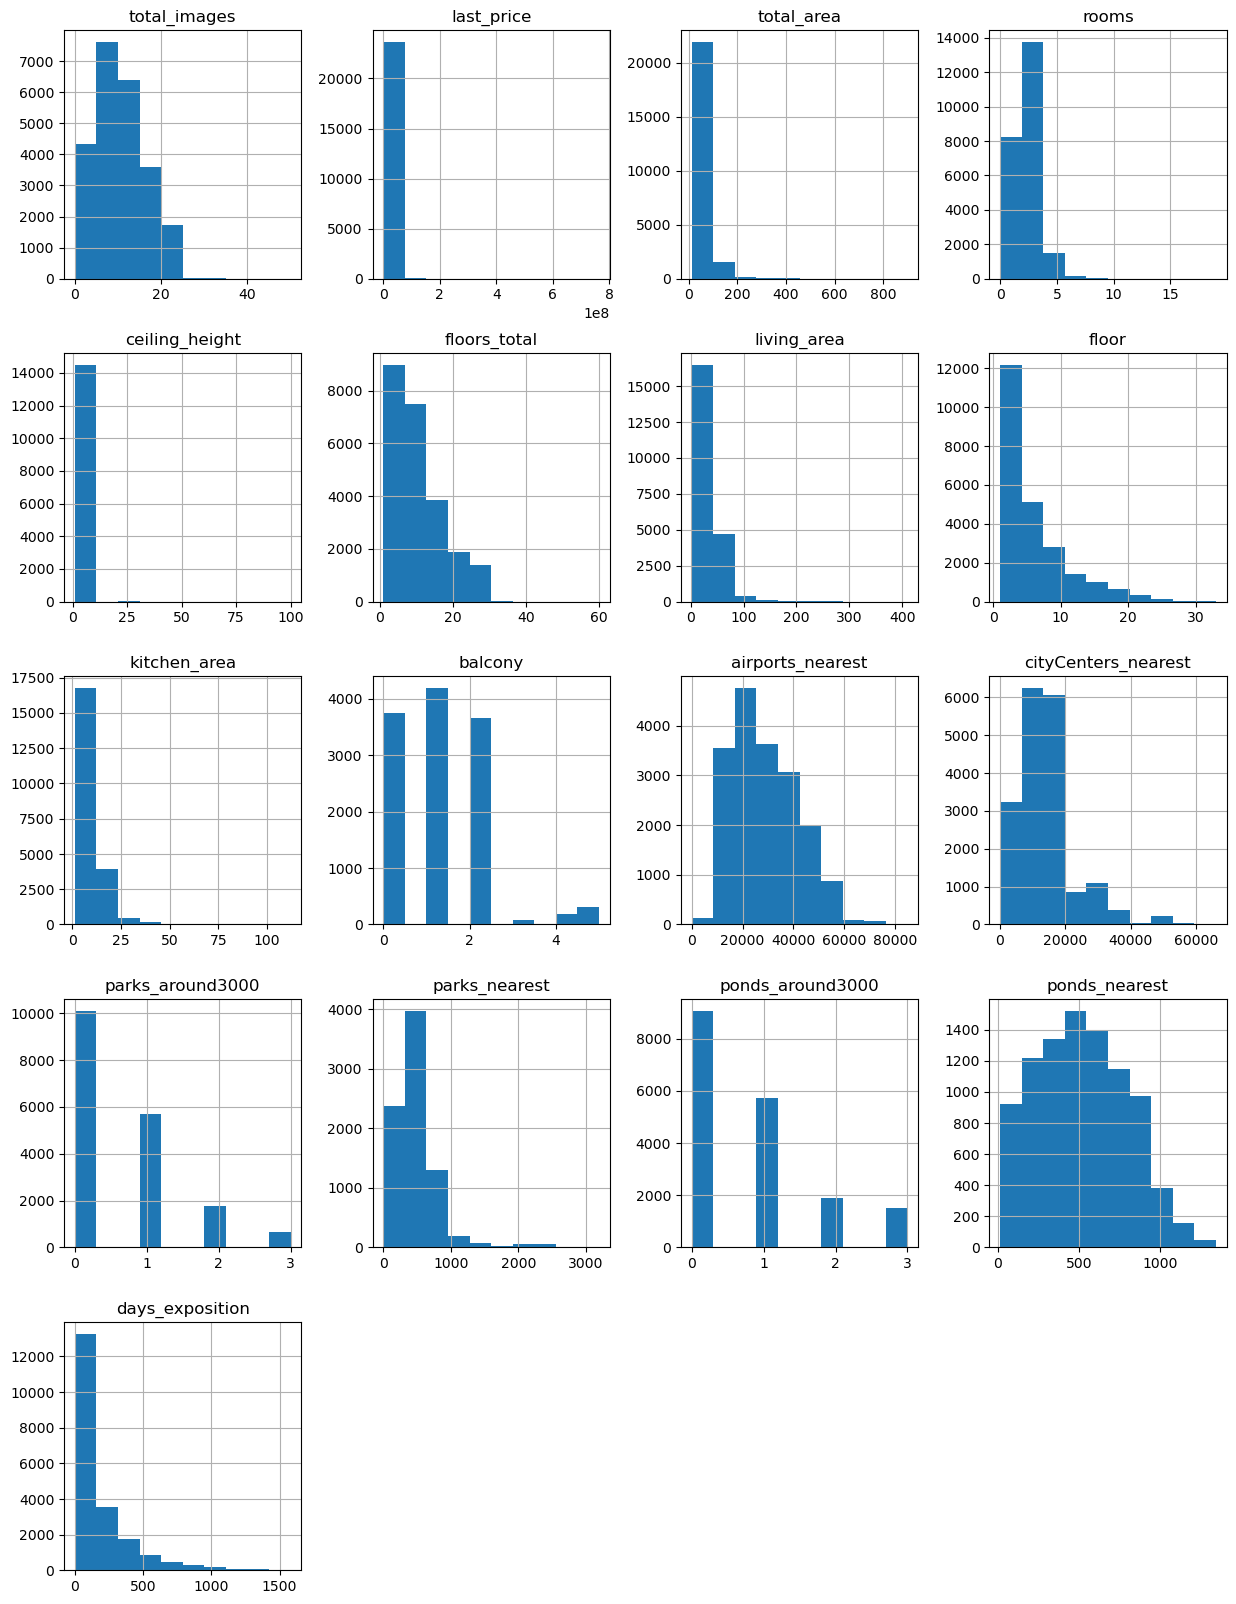

In [6]:
df.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-info"> <b>Вывод:</b>
    
Проанализировали общую информацию о данных:
    
- Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных. 
- По гистограммам видно, что в данных есть аномальные значения. 
- Явные дубликаты отсутствуют. 
- Данные признаны полными и достаточными для исследования.
</div>  

## Выполните предобработку данных

**Переименуем столбцы, согласно правил "правильного стиля".**

In [7]:
df = df.rename(columns=
     {'cityCenters_nearest' : 'city_centers_nearest', 
     'parks_around3000' : 'parks_around_3000',
     'ponds_around3000' : 'ponds_around_3000'}
      )

### Обработка пропусков

**Выявим пропущенные значения во всех столбцах датафрейма с помощью комбинации двух методов в процентах.**

In [8]:
pd.DataFrame(round(df.isna().mean()*100, 2)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.360000
living_area,8.030000
floor,0.000000
is_apartment,88.290000


**Пропущенные значения столбца `'living_area'` (жилая площадь в квадратных метрах) (8% от общего числа значений), оставим без изменений, так как  мы не имеем пропусков в другом соответсвующем значении столбца `'total_area'`- общая площадь квартиры.**

**Пропущенные значения столбца `'is_apartment'` (апартаменты) заменим на значение `'False'`. Скорее всего продавец просто не заполнил данную строку.**

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False)

**Пропущенные значения столбца `'balcony'` (число балконов) заменим на нулевое значение, ведь если продавец не указал число балконов, то, скорее всего, в его квартире их нет.**

In [10]:
df['balcony'] = df['balcony'].fillna(0)

**Пропущенные значения  `'locality_name'` (название населённого пункта) заполним значением  `'unidentified'`. То есть укажем, что это геолокация продажи неустановлена.**

In [11]:
df['locality_name'] = df['locality_name'].fillna('unidentified')

**Пропущенные значения столбца `'parks_around_3000'` (число парков в радиусе 3 км) заменим на нулевое значение, ведь если продавец не указал число то, скорее всего на таком расстоянии от объекта продажи их нет.**

In [12]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(0)

**Пропущенные значения столбца `'ponds_around_3000'` (число водоёмов в радиусе 3 км) заменим на нулевое значение, ведь если продавец не указал число то, скорее всего на таком расстоянии от объекта продажи их нет.**

In [13]:
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)

**Пропущенные значения столбцов `'airports_nearest'`, `'city_centers_nearest'`, `'parks_nearest'`, `'ponds_nearest'` (расстояния до аэропорта, центра города, парка, водоёма) говорят скорее всего о том, что продаваемые квартиры находятся далеко от этих объектов. Оставим без изменений. Пропущенные значения столбца `'days_exposition'` (сколько дней было размещено объявление (от публикации до снятия)), указывают на то, что объект скорее всего не продан. Оставим без изменений.**

### Удаление пропусков и обработка аномальных значений

**Обработаем столбец `'ceiling_height'` (высота потолков). Отсортируем по убыванию уникальные значения.**

In [14]:
df['ceiling_height'].sort_values(ascending=False).unique()

array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   6.  ,   5.8 ,   5.6 ,
         5.5 ,   5.3 ,   5.2 ,   5.  ,   4.9 ,   4.8 ,   4.7 ,   4.65,
         4.5 ,   4.45,   4.4 ,   4.37,   4.3 ,   4.25,   4.2 ,   4.19,
         4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,   3.95,   3.93,
         3.9 ,   3.88,   3.87,   3.86,   3.85,   3.84,   3.83,   3.82,
         3.8 ,   3.78,   3.76,   3.75,   3.7 ,   3.69,   3.68,   3.67,
         3.66,   3.65,   3.63,   3.62,   3.6 ,   3.59,   3.58,   3.57,
         3.56,   3.55,   3.54,   3.53,   3.52,   3.51,   3.5 ,   3.49,
         3.48,   3.47,   3.46,   3.45,   3.44,   3.43,   3.42,   3.4 ,
         3.39,   3.38,   3.37,   3.36,   3.35,   3.34,   3.33,   3.32,
         3.31,   3.3 ,   3.29,   3.28,   3.27,   3.26,   3.25,   3.24,
         3.23,   3.22,   3.21,   3.2 ,   3.18,   3.17,   3.16,   3.15,
         3.14,   3.13,   3.12,   3.11,   3.1 ,   3.09,   3.08,   3.07,
      

**Создадим функцию для обработки значений столбца `'ceiling_height'` (высота потолков). Пропущенные значения заполним медианным значением `'ceiling_height'`. Высота потолков согласно СНиП в жилых помещениях должна быть не меньше 2,5 метра, заменим аномальные значения ниже 2.5 на медианное. Также предположим, что значения от 25.0 до 32.0, скорее всего опечатка, поэтому разделим эти значения на 10. Значение больше 32.0 заменим на медианное.**

In [15]:
def replace_ceiling_height(df, column_name):
    median_value = df[column_name].median()
    for index, row in df.iterrows():
        if pd.isna(row[column_name]):
            df.loc[index, column_name] = median_value
        elif 25 <= row[column_name] <= 32:
            df.loc[index, column_name] = row[column_name] / 10 
        elif 0 <= row[column_name] <= 2.4:
            df.loc[index, column_name] = median_value
        elif row[column_name] > 32:
            df.loc[index, column_name] = median_value
    return df



In [16]:
df = replace_ceiling_height(df, 'ceiling_height')

In [17]:
df['ceiling_height'].sort_values(ascending=False).unique()

array([24.  , 22.6 , 20.  , 14.  , 10.3 ,  8.3 ,  8.  ,  6.  ,  5.8 ,
        5.6 ,  5.5 ,  5.3 ,  5.2 ,  5.  ,  4.9 ,  4.8 ,  4.7 ,  4.65,
        4.5 ,  4.45,  4.4 ,  4.37,  4.3 ,  4.25,  4.2 ,  4.19,  4.15,
        4.14,  4.1 ,  4.06,  4.  ,  3.98,  3.95,  3.93,  3.9 ,  3.88,
        3.87,  3.86,  3.85,  3.84,  3.83,  3.82,  3.8 ,  3.78,  3.76,
        3.75,  3.7 ,  3.69,  3.68,  3.67,  3.66,  3.65,  3.63,  3.62,
        3.6 ,  3.59,  3.58,  3.57,  3.56,  3.55,  3.54,  3.53,  3.52,
        3.51,  3.5 ,  3.49,  3.48,  3.47,  3.46,  3.45,  3.44,  3.43,
        3.42,  3.4 ,  3.39,  3.38,  3.37,  3.36,  3.35,  3.34,  3.33,
        3.32,  3.31,  3.3 ,  3.29,  3.28,  3.27,  3.26,  3.25,  3.24,
        3.23,  3.22,  3.21,  3.2 ,  3.18,  3.17,  3.16,  3.15,  3.14,
        3.13,  3.12,  3.11,  3.1 ,  3.09,  3.08,  3.07,  3.06,  3.05,
        3.04,  3.03,  3.02,  3.01,  3.  ,  2.99,  2.98,  2.97,  2.96,
        2.95,  2.94,  2.93,  2.92,  2.91,  2.9 ,  2.89,  2.88,  2.87,
        2.86,  2.85,

**Обработаем столбец `'floors_total'` (всего этажей в доме). Отсортируем по убыванию уникальные значения.**

In [18]:
df['floors_total'].sort_values(ascending=False).unique()

array([60., 52., 37., 36., 35., 34., 33., 29., 28., 27., 26., 25., 24.,
       23., 22., 21., 20., 19., 18., 17., 16., 15., 14., 13., 12., 11.,
       10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., nan])

**Проанализируем строки, где есть пропущенные значения столбца `'floors_total'`.**

In [19]:
df.loc[df['floors_total'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,False,...,12.00,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,False,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,False,...,NaN,0.0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,False,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,False,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,False,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


**Создадим функцию `'replace_floors_total'` для обработки значений столбца `'floors_total'`. Пропущенные значения  `'floors_total'`заполним по условию, если в соответствующем столбце `'floor'` значение меньше либо равно медиане столбца `'floors_total'`, то заполняем пропуск медианой. Если значение в соответствующем столбце `'floor'` больше медианы, то заполняем пустое значение первого столбца соответствующим значением столбца `'floor'`. То есть проверим соответсвие заявленного этажа квартиры медиане этажности здания**

In [20]:
def replace_floors_total(df, column_name_1, column_name_2):
    median_value = df[column_name_1].median()
    for index, row in df.iterrows():
        if pd.isna(row[column_name_1]):
            if row[column_name_2] <= median_value:
                df.loc[index, column_name_1] = median_value
            else:
                df.loc[index, column_name_1] = row[column_name_2]
    return df
df = replace_floors_total(df, 'floors_total', 'floor')

In [21]:
df['floors_total'].sort_values(ascending=False).unique()

array([60., 52., 37., 36., 35., 34., 33., 29., 28., 27., 26., 25., 24.,
       23., 22., 21., 20., 19., 18., 17., 16., 15., 14., 13., 12., 11.,
       10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

**По сводной таблице видем что в студиях нет кухонных зон и также их нет в части апартаментов. Создадим функцию `'replace_kitchen_area'` для обработки значений столбца `'kitchen_area'`. Пропущенные значения столбца `'kitchen_area'`заполним по условию, если в соответствующих столбцах `'studio'`, `'is_apartment'` значение  `'False'`, то заполняем пропуск медианой столбца `'kitchen_area'`. Иначе проставляем нулевое значение.**

In [22]:
df.pivot_table(index=['studio', 'is_apartment'], values= 'kitchen_area', aggfunc=['count'])

count
                    kitchen_area
studio is_apartment             
False  False               21386
       True                   35
True   False                   0

In [23]:
def replace_kitchen_area(df, column_1, column_2, column_3):
    median_value = df[column_1].median()
    for index, row in df.iterrows():
        if pd.isna(row[column_1]):
            if (row[column_2] == False) & (row[column_3] == False):
                df.loc[index, column_1] = median_value
            else:
                df.loc[index, column_1] = 0
    return df
df = replace_kitchen_area(df, 'kitchen_area', 'studio', 'is_apartment')

### Изменение типов данных

**Заменим вещественный тип данных в столбце `last_price` на целочисленный с помощью метода `astype()`.Так как для анализа цены на момент снятия с публикации (столбец `'last_price'`), цифры после запятой значения не имеют.**

In [24]:
df['last_price'] = df['last_price'].astype('int')

**Заменим объектный тип данных в столбце `first_day_exposition` на временной с помощью метода `pd.to_datetime()`. Для анализа данных нам будет необходим временной тип. Время подачи объявления о продаже нас не интересует - убираем.**

In [25]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')

**Заменим вещественный тип данных в столбце `balcony` на целочисленный с помощью метода `astype()`. Количество балконов - это всегда целое число.**

In [26]:
df['balcony'] = df['balcony'].astype('int')

**Заменим объектный тип данных в столбце `is_apartment` на булев с помощью метода `astype()`.**

In [27]:
df['is_apartment'] = df['is_apartment'].astype('bool')

### Обработка дубликатов

**Подсчитаем количество уникальных значений в столбце `locality_name`.**

In [28]:
df['locality_name'].nunique()

365

**Обработаем столбец `'locality_name'` (название населённого пункта). Отсортируем по убыванию уникальные значения.**

In [29]:
set(df['locality_name'].sort_values(ascending=True).unique())

{'unidentified',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоро

**Устраним неявные дубликаты в столбце `'locality_name'` заменим все названия на строчные символы, заменим `'ё'` на `'е'`, унифицируем названия, которые могут приводить к дублированию.**

In [30]:
df['locality_name'] = df['locality_name'].str.lower()\
    .str.replace('ё', 'е').replace({
    'поселок городского типа':'городской поселок',
    'поселок при железнодорожной станции':'поселок станции',
    'садоводческое некоммерческое товарищество':'садовое товарищество'},
     regex=True)  

In [31]:
df['locality_name'].nunique()

322

**Проверим пропущенные значения во всех столбцах датафрейма и проверим типы данных после обработки.**

In [32]:
pd.DataFrame(round(df.isna().mean()*100, 2)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,8.030000
floor,0.000000
is_apartment,0.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

<div class="alert alert-info"> <b>Вывод по разделу:</b>

Причины пропущенных значений:
    
- Человеческий фактор.
- Недоработки программного обеспечения
В процессе предобработки данных было сделано следующее:
- Переименованы названия столбцов cityCenters_nearest на city_centers_nearest,
'parks_around3000' на 'parks_around_3000','ponds_around3000' на 'ponds_around_3000'.
- Заполнены пропущенные значения в таблице для некоторых параметров датафрейма.
- Изменены типы данных, в соответствии с данными находяшимися в столбцах.
- Проведена работа с неявными дубликатами.
</div>

### Добавим в таблицу новые столбцы

**Добавим в таблицу столбец цена одного квадратного метра  `' price_one_square_meter'`. Разделим стоимость объекта на его общую площадь, а затем округлим до двух знаков после запятой. Отсортируем по убыванию уникальные значения.**

In [34]:
df['price_one_square_meter'] = (df['last_price'] / df['total_area']).round(2)

In [35]:
df['price_one_square_meter'].sort_values(ascending=True).unique()

array([1.11830000e+02, 7.96296000e+03, 9.61538000e+03, ...,
       1.54260480e+06, 1.73684211e+06, 1.90750000e+06])

**Добавим в таблицу столбец день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)  `' day_published'`. Используем метод  `' dt.weekday'`. Отсортируем по убыванию уникальные значения.**

In [36]:
df['day_published'] = df['first_day_exposition'].dt.weekday

In [37]:
df['day_published'].sort_values(ascending=True).unique()

array([0, 1, 2, 3, 4, 5, 6])

**Добавим в таблицу столбец месяц публикации объявления  `' month_published'`. Используем метод  `' dt.month'`. Отсортируем по убыванию уникальные значения. Отсортируем по убыванию уникальные значения.**

In [38]:
df['month_published'] = df['first_day_exposition'].dt.month

In [39]:
df['month_published'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

**Добавим в таблицу столбец год публикации объявления  `' year_published'`. Используем метод  `' dt.year'`. Отсортируем по убыванию уникальные значения.**

In [40]:
df['year_published'] = df['first_day_exposition'].dt.year

In [41]:
df['year_published'].sort_values(ascending=True).unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

**Добавим в таблицу столбец тип этажа квартиры (значения — «первый», «последний», «другой»)  `'type_apartment_floor'`. Используем функцию  `' floor_name'`. Отсортируем по убыванию уникальные значения.**

In [42]:
def floor_name(row):
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total'] :
        return "последний"       
    else:
        return "другой"
df['type_apartment_floor'] = df.apply(floor_name, axis=1)

In [43]:
df['type_apartment_floor'].sort_values(ascending=True).unique()

array(['другой', 'первый', 'последний'], dtype=object)

**Добавим в таблицу столбец расстояние до центра города в километрах  `'distance_to_city_center'`. Разделим значения из столбца `'city_centers_nearest'` на 1000 и округлим полученное значение до целого. Отсортируем по убыванию уникальные значения.**


In [44]:
df['distance_to_city_center'] = (df['city_centers_nearest'] / 1000).round(0)

In [45]:
df['distance_to_city_center'].sort_values(ascending=True).unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 39.,
       40., 41., 42., 43., 45., 47., 48., 49., 50., 51., 52., 53., 54.,
       55., 57., 59., 60., 61., 62., 63., 65., 66., nan])

## Проведите исследовательский анализ данных

### Изучим количественные показатели продаваемых объектов от отдельных параметров. Построим  гистограммы для каждого из этих параметров.

**Получим числовое описание данных датафрейма методом `'describe()'`.**

In [46]:
df[['total_area',
    'rooms',
    'living_area',
    'last_price',
    'kitchen_area',
    'ceiling_height',
    'floors_total',
    'city_centers_nearest',
    'parks_nearest']].describe()

,total_area,rooms,living_area,last_price,kitchen_area,ceiling_height,floors_total,city_centers_nearest,parks_nearest
count,23699.000000,23699.000000,21796.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,18180.000000,8079.000000
mean,60.348651,2.070636,34.457852,6.541549e+06,10.365553,2.701761,10.678678,14191.277833,490.804555
std,35.654083,1.078405,22.030445,1.088701e+07,5.696141,0.331209,6.591239,8608.386210,342.317995
min,12.000000,0.000000,2.000000,1.219000e+04,0.000000,2.450000,1.000000,181.000000,1.000000
25%,40.000000,1.000000,18.600000,3.400000e+06,7.200000,2.600000,5.000000,9238.000000,288.000000
50%,52.000000,2.000000,30.000000,4.650000e+06,9.100000,2.650000,9.000000,13098.500000,455.000000
75%,69.900000,3.000000,42.300000,6.800000e+06,11.440000,2.700000,16.000000,16293.000000,612.000000
max,900.000000,19.000000,409.700000,7.630000e+08,112.000000,24.000000,60.000000,65968.000000,3190.000000


##### Анализ общей площади квартир.

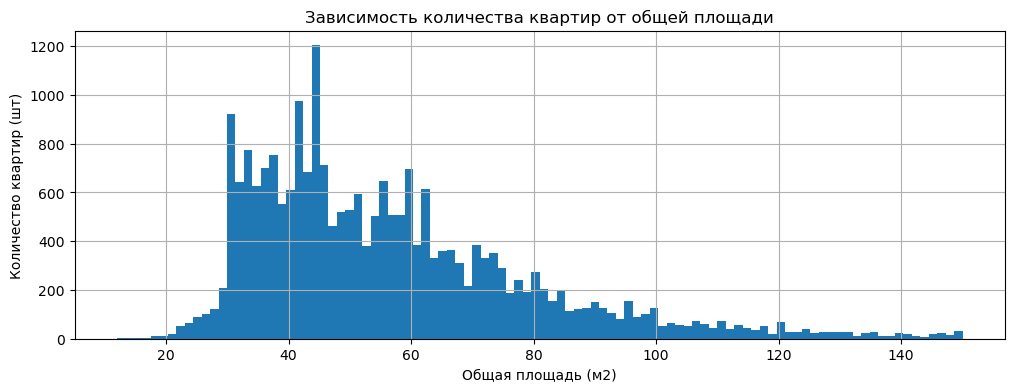

In [47]:
df.hist(column = 'total_area', bins = 100, range = (12, 150), figsize=(12,4))
plt.title('Зависимость количества квартир от общей площади')
plt.xlabel('Общая площадь (м2)')
plt.ylabel('Количество квартир (шт)')
plt.show()


**Вывод:** Наибольшее предложение квартир на рынке недвижимости в диапазоне от 30 до 50 м2. Пик продаж приходятся на квартиры площадью 45 м2.

##### Анализ количества комнат в квартирах.

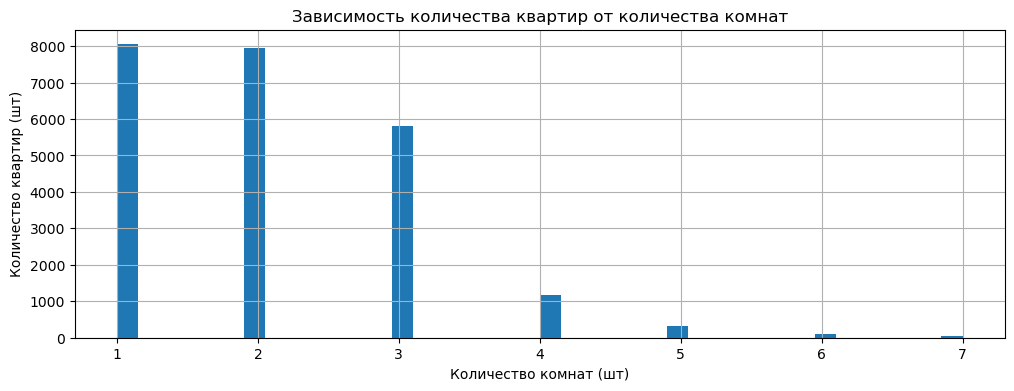

In [48]:
df.hist(column = 'rooms', bins = 40, range = (1, 7), figsize=(12,4))
plt.title('Зависимость количества квартир от количества комнат')
plt.xlabel('Количество комнат (шт)')
plt.ylabel('Количество квартир (шт)')
plt.show()

**Вывод:** Наибольшее предложение квартир на рынке недвижимости это одно- и двухкомнатные. А доля 1,2,3-х комнатных квартир составляет около 92% от общего количества квартир.

##### Анализ жилой площади квартир.

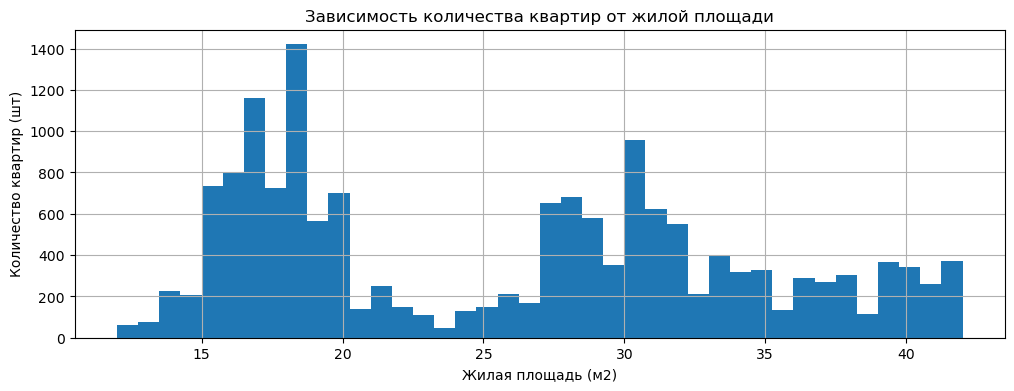

In [49]:
df.hist(column = 'living_area', bins = 40, range = (12, 42), figsize=(12,4))
plt.title('Зависимость количества квартир от жилой площади')
plt.xlabel('Жилая площадь (м2)')
plt.ylabel('Количество квартир (шт)')
plt.show()

**Вывод:** Наибольшее предложение квартир выделяютс по двум диапазонам от 15 кв.м. до 21 кв.м. (с пиком квартир площадью 21 кв.м.) и от 26 кв.м. до 42 кв.м.(с пиком квартир площадью 30 кв.м.). При этом виден явный спад по предложениям квартир в диапазоне от 22 кв.м. до 24 кв.м.

##### Анализ цены

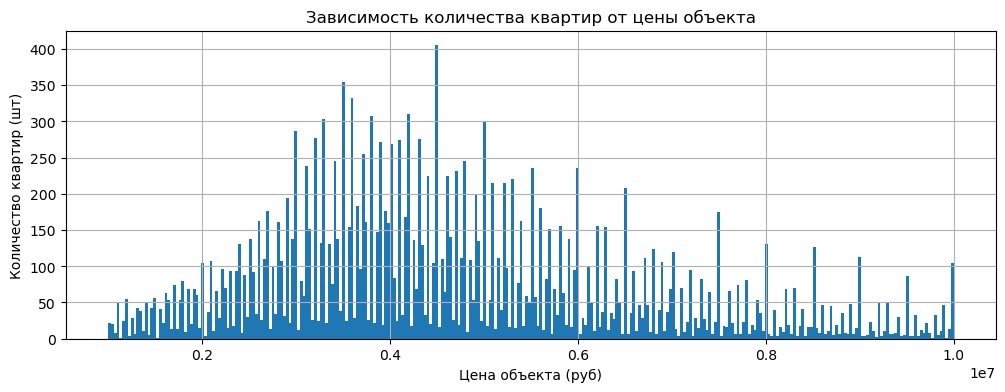

In [50]:
df.hist(column = 'last_price', bins = 300, range = (1.000000e+06, 1.000000e+07), figsize=(12,4))
plt.title('Зависимость количества квартир от цены объекта')
plt.xlabel('Цена объекта (руб)')
plt.ylabel('Количество квартир (шт)')
plt.show()

**Вывод:** Больше всего квартир в ценовом диапазоне от 3,5 млн. руб. до 4,5 млн.руб. Пик количества предложений - это квартиры стоимостью 4,5 млн.руб.

##### Анализ зависимости от площади кухни.

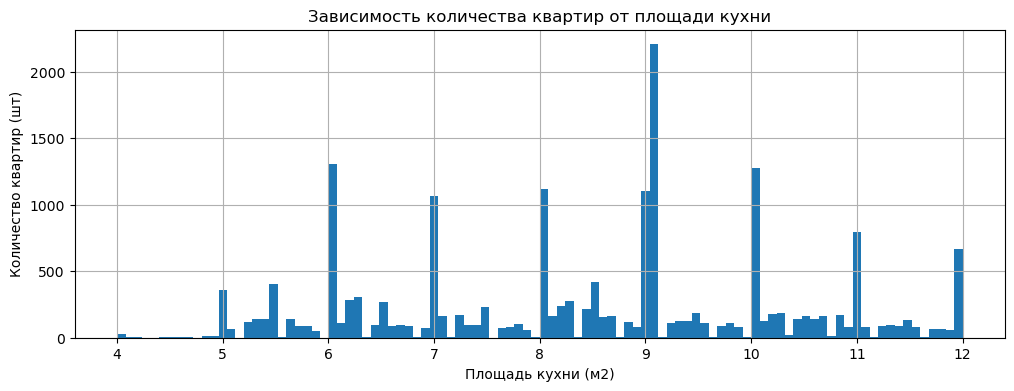

In [51]:
df.hist(column = 'kitchen_area', bins = 100, range = (4, 12), figsize=(12,4))
plt.title('Зависимость количества квартир от площади кухни')
plt.xlabel('Площадь кухни (м2)')
plt.ylabel('Количество квартир (шт)')
plt.show()

**Вывод:** Больше всего квартир с площадью кухни 6 кв.м. и 9 кв.м. Но, так как мы обработали пропущенные значения и заменили их на медианные (9 кв.м.), возможно значение площади кухни в этом значении будет не слишком адекватно.Также обращает на себя внимание тот факт, что в объявлениях очень часто указывают целочисленные значения квадратуры кухни.

##### Анализ зависимости от высоты потолков.

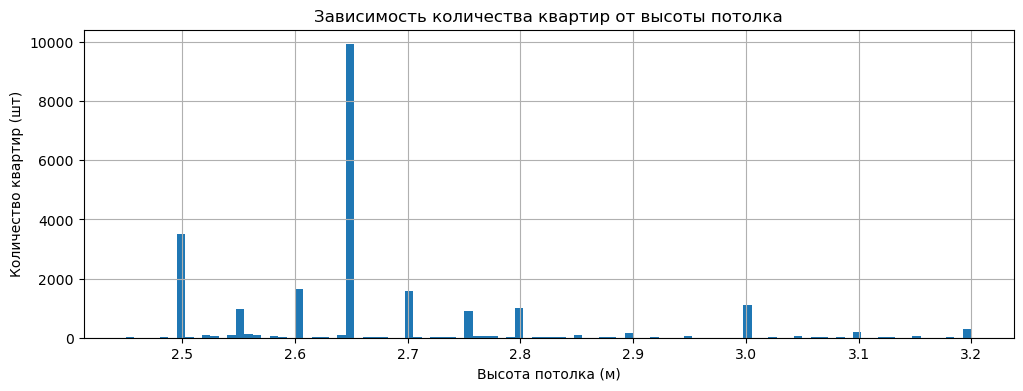

In [52]:
df.hist(column = 'ceiling_height', bins = 100, range = (2.45, 3.2), figsize=(12,4))
plt.title('Зависимость количества квартир от высоты потолка')
plt.xlabel('Высота потолка (м)')
plt.ylabel('Количество квартир (шт)')
plt.show()

**Вывод:** Среди всех объявлений о продаже явно выделяются квартиры с высотой потолка 2.65 метра.

##### Анализ зависимости от количества этажей жилого здания.

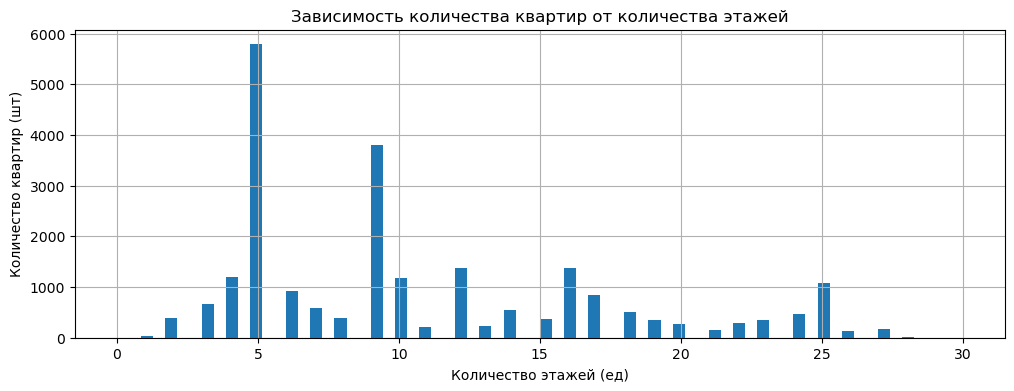

In [53]:
df.hist(column = 'floors_total', bins = 70, range = (0, 30), figsize=(12,4))
plt.title('Зависимость количества квартир от количества этажей')
plt.xlabel('Количество этажей (ед)')
plt.ylabel('Количество квартир (шт)')
plt.show()

**Вывод:** Пяти- и девяэтажные жилые дома преобладают на рынке недвижимости.

##### Анализ зависимости от расстояния до центра города.

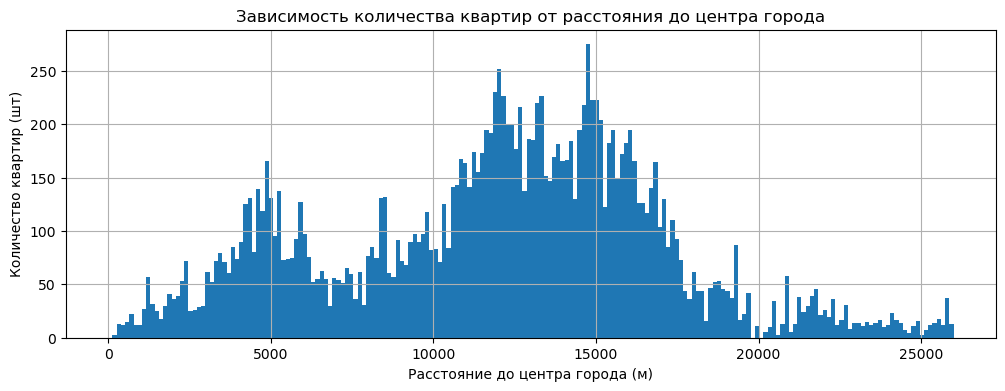

In [54]:
df.hist(column = 'city_centers_nearest', bins = 200, range = (0, 26000), figsize=(12,4))
plt.title('Зависимость количества квартир от расстояния до центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Количество квартир (шт)')
plt.show()

**Вывод:** Основное количество выставленных на продажу квартир находится на удалении 12-15 км от центра города. Наибольшее количество квартир зафиксировано на отметке 15 км. Также есть неплохой пик на отметке 5 км. Можно констатировать тот факт, что большее число квартир находятся в спальных районах.

##### Анализ зависимости от расстояния до ближайшего парка.

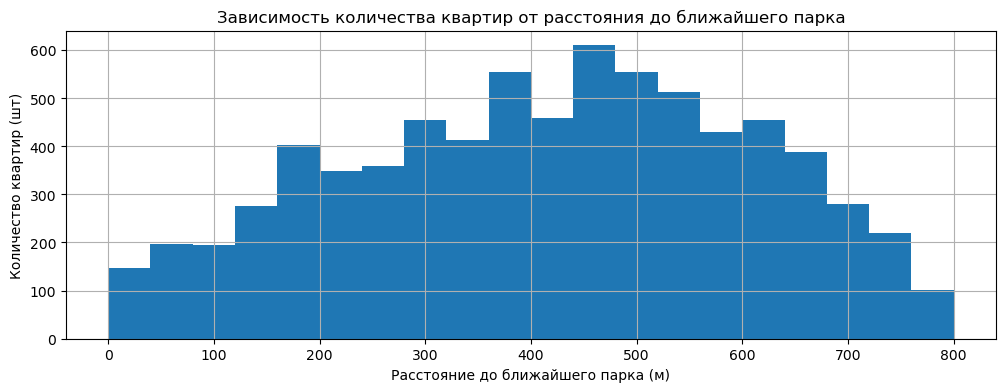

In [55]:
df.hist(column = 'parks_nearest', bins = 20, range = (0, 800), figsize=(12,4))
plt.title('Зависимость количества квартир от расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Количество квартир (шт)')
plt.show()

**Вывод:** Количество предложений не сильно зависит от расстояния от ближайшего парка. Среднее расстояние до парка составляет около 500 метров.

##### Анализ зависимости от типа этажа расположения квартир.

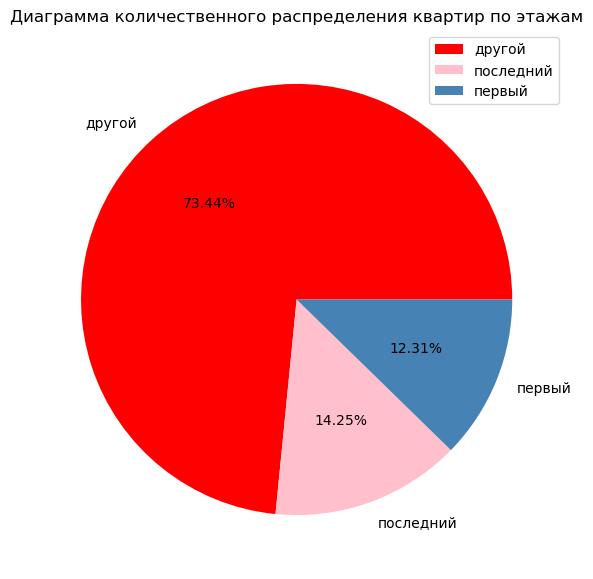

In [56]:
(df.pivot_table(index='type_apartment_floor', values='last_price', aggfunc='count')\
.sort_values('last_price', ascending=False)\
.plot.pie(y='last_price', figsize=(7,7),
label='',            
autopct='%0.2f%%',
colors = ['red', 'pink', 'steelblue'],
title='Диаграмма количественного распределения квартир по этажам'))
plt.show()

**Вывод:** Количество предложений первый этаж 14.25% последний этаж 12.31%, что в сумме составляет 26,5% от общего числа предложений. Можно предположить, что люди чаще стараются продать квартиры на этих этажах.

<div class="alert alert-info"> <b>Вывод:</b>

- Наибольшее предложение квартир на рынке недвижимости в диапазоне от 30 до 50 м2. Пик продаж приходятся на квартиры общей площадью 45 м2.
- Наибольшее предложение квартир на рынке недвижимости это одно- и двухкомнатные. А доля 1,2,3-х комнатных квартир составляет около 92% от общего количества квартир.
- Наибольшее предложение квартир выделяютс по двум диапазонам жилой площади от 15 кв.м. до 21 кв.м. (с пиком квартир площадью 21 кв.м.) и от 26 кв.м. до 42 кв.м.(с пиком квартир площадью 30 кв.м.). При этом виден явный спад по предложениям квартир в диапазоне от 22 кв.м. до 24 кв.м.
- Больше всего квартир в ценовом диапазоне от 3,5 млн. руб. до 4,5 млн.руб. Пик количества предложений - это квартиры стоимостью 4,5 млн.руб.
- Больше всего квартир с площадью кухни 6 кв.м. и 9 кв.м. Но, так как мы обработали пропущенные значения и заменили их на медианные (9 кв.м.), возможно значение площади кухни в этом значении будет не слишком адекватно.Также обращает на себя внимание тот факт, что в объявлениях очень часто указывают целочисленные значения квадратуры кухни.
- Среди всех объявлений о продаже явно выделяются квартиры с высотой потолка 2.65 метра.
- Пяти- и девяэтажные жилые дома преобладают на рынке недвижимости.
- Основное количество выставленных на продажу квартир находится на удалении 12-15 км от центра города. Наибольшее количество квартир зафиксировано на отметке 15 км. Также есть неплохой пик на отметке 5 км. Можно констатировать тот факт, что большее число квартир находятся в спальных районах.
- Количество предложений не сильно зависит от расстояния от ближайшего парка. Среднее расстояние до парка составляет около 500 метров.
- Количество предложений первый этаж 14.25% последний этаж 12.31%, что в сумме составляет 26,5% от общего числа предложений. Можно предположить, что люди чаще стараются продать квартиры на этих этажах.
    
*На основании вышеизложенного можно представить "типичный портрет" квартиры: общей площадью около 50 кв. м., с кухней от 6 кв.м., жилой площадью больше 20 кв.м. , стоимостью около 4 млн.руб с высотой потолков 2,65 метра в пятиэтажном доме, расположенном в спальном районе города.*  
</div>  

### Изучим, как быстро продавались квартиры.

**Получим числовое описание данных столбца `'days_exposition'` методом `'describe()'`.**

In [57]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Построим гистограммы.**

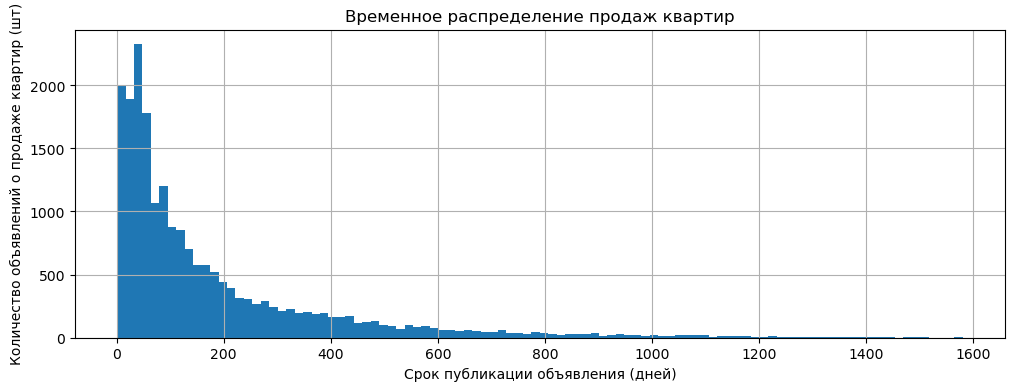

In [58]:
df.hist(column = 'days_exposition', bins = 100, figsize=(12,4))
plt.title('Временное распределение продаж квартир')
plt.xlabel('Срок публикации объявления (дней)')
plt.ylabel('Количество объявлений о продаже квартир (шт)')
plt.show()

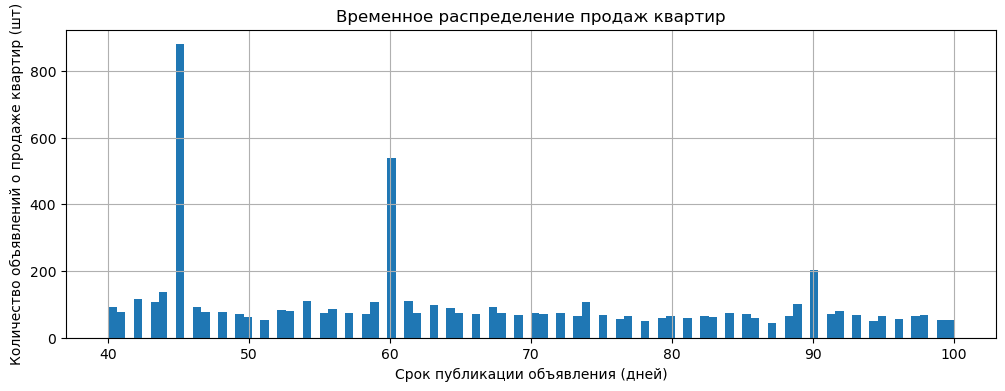

In [59]:
df.hist(column = 'days_exposition', bins = 100, range = (40, 100), figsize=(12,4))
plt.title('Временное распределение продаж квартир')
plt.xlabel('Срок публикации объявления (дней)')
plt.ylabel('Количество объявлений о продаже квартир (шт)')
plt.show()

**Изучим выбросы с помощью диаграммы размаха.**

<Axes: >

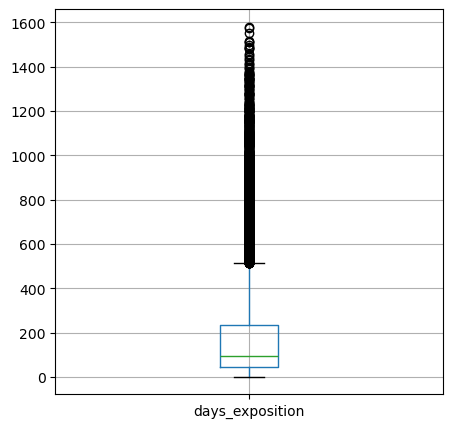

In [60]:
df.boxplot(column=['days_exposition'], figsize=(5, 5))

**Посчитаем межквартильный размах.**

In [61]:
q1 = df['days_exposition'].quantile(0.25)
q3 = df['days_exposition'].quantile(0.75)
iqr = q3 - q1
lower_bound = round((q1 - 1.5*iqr), 2)
upper_bound = round((q3 + 1.5*iqr), 2)
print(upper_bound)

512.5


In [62]:
('Выбросы:',df[df['days_exposition'] > upper_bound]['days_exposition'].count())

('Выбросы:', 1669)

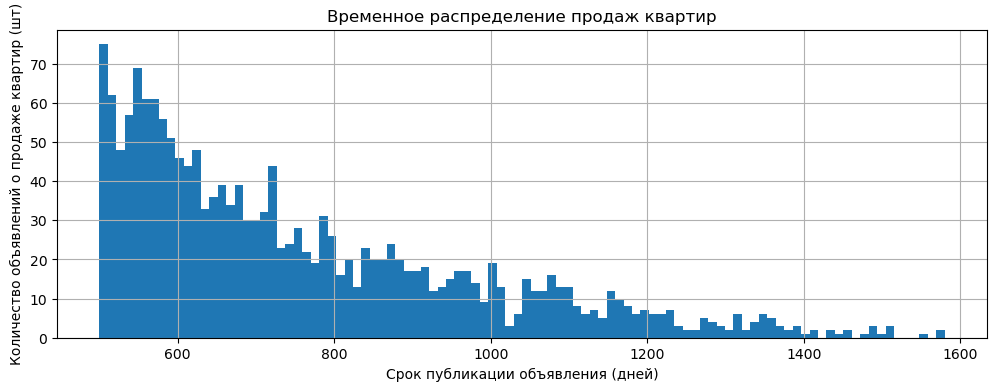

In [63]:
df.hist(column = 'days_exposition', range = (500, 1580), bins = 100, figsize=(12,4))
plt.title('Временное распределение продаж квартир')
plt.xlabel('Срок публикации объявления (дней)')
plt.ylabel('Количество объявлений о продаже квартир (шт)')
plt.show()

<div class="alert alert-info"> <b>Вывод:</b> 

Cреднее время продажи квартиры составляет 181 день - это около полугода. А медианное значение составляет 95 дней. Такая разница объясняется длинным хвостом из продаж квартир, которые продавались от трех лет. Возможно люди не снимали объявления, а продажи квартир уже не велись (то есть вполне возможно здесь имеет место быть недоработка программного обеспечения). Также наблюдаются интересные пики в продажах 45 дней, 60 дней, 90 дней. Возможно эти объявления снимались из-за неоплаты продавцом платного размещения.
Считаю быстрые - это продажи до 95 дней (второй квартиль), а необычно долгие - свыше 512 дней (верхний предел). 
</div> 

### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.

**Получим зависимость данных столбца `'last_price'` от столбцов с числовыми значениями методом `'corr()'`.**

In [64]:
df[['last_price',
    'total_area',         
    'living_area',
    'kitchen_area',
    'rooms', 
    'day_published',
    'month_published',
    'year_published']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,day_published,month_published,year_published
last_price,1.000000,0.653675,0.566492,0.438352,0.363343,0.001550,0.002779,-0.043089
total_area,0.653675,1.000000,0.939537,0.572190,0.758344,-0.004695,0.004920,-0.079912
living_area,0.566492,0.939537,1.000000,0.422128,0.845977,-0.005605,-0.002483,-0.072696
kitchen_area,0.438352,0.572190,0.422128,1.000000,0.273151,-0.009803,0.003638,-0.055801
rooms,0.363343,0.758344,0.845977,0.273151,1.000000,-0.004134,-0.004469,-0.055418
day_published,0.001550,-0.004695,-0.005605,-0.009803,-0.004134,1.000000,0.011496,-0.004799
month_published,0.002779,0.004920,-0.002483,0.003638,-0.004469,0.011496,1.000000,-0.269642
year_published,-0.043089,-0.079912,-0.072696,-0.055801,-0.055418,-0.004799,-0.269642,1.000000


**Напишем функцию `'remove_outliers'`, которая избавить, изучаемые столбцы от выбросов за пределами 1,5 межквартильного размаха.**

In [65]:
def remove_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = round((q1 - 1.5*iqr), 2)
        upper_bound = round((q3 + 1.5*iqr), 2)
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df
list_columns = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']
df_outliers = remove_outliers(df, list_columns)

**Получим зависимость данных столбца `'last_price'` от столбцов с числовыми значениями методом `'corr()'` после обработки функцией `'remove_outliers'`.**

In [66]:
df_outliers[['last_price',
             'total_area',         
             'living_area',
             'kitchen_area',
            'rooms', 
            'day_published',
            'month_published',
            'year_published']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,day_published,month_published,year_published
last_price,1.000000,0.672395,0.547453,0.449857,0.420787,-0.007300,-0.003810,0.026111
total_area,0.672395,1.000000,0.914337,0.378261,0.810531,-0.002516,-0.000045,-0.044961
living_area,0.547453,0.914337,1.000000,0.099383,0.903077,0.002494,-0.005249,-0.033331
kitchen_area,0.449857,0.378261,0.099383,1.000000,-0.038156,-0.006825,0.018253,-0.036977
rooms,0.420787,0.810531,0.903077,-0.038156,1.000000,0.004160,-0.006347,-0.022476
day_published,-0.007300,-0.002516,0.002494,-0.006825,0.004160,1.000000,0.009239,-0.007404
month_published,-0.003810,-0.000045,-0.005249,0.018253,-0.006347,0.009239,1.000000,-0.251421
year_published,0.026111,-0.044961,-0.033331,-0.036977,-0.022476,-0.007404,-0.251421,1.000000


**Вывод:** 

После обработки данные корреляции несколько улучшились.

**Построим графики, которые покажут зависимость цены от указанных выше параметров.**

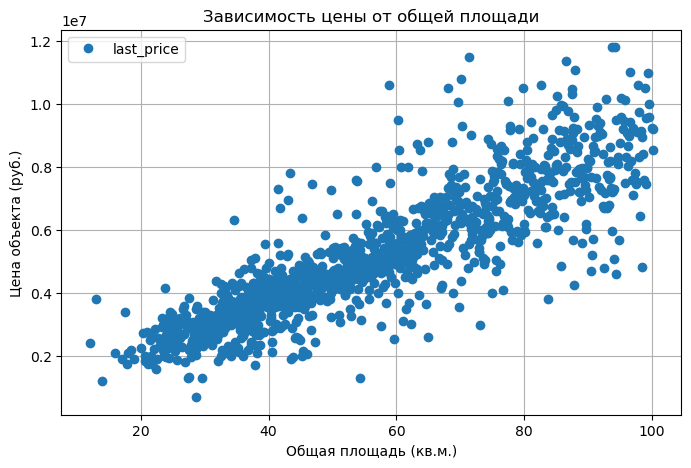

In [67]:
df_outliers.pivot_table(index='total_area', values='last_price')\
.plot(grid=True, style='o', figsize=(8, 5))
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (кв.м.)')
plt.ylabel('Цена объекта (руб.)')
plt.show()

**Вывод:** 

По графику видно, что довольно-таки зависимость хорошую.

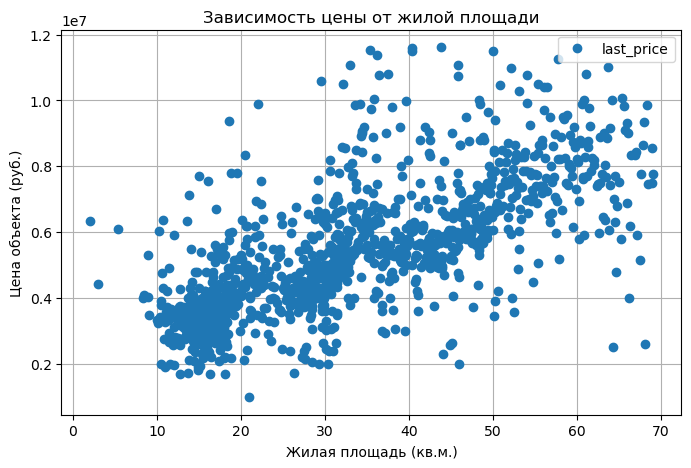

In [68]:
df_outliers.pivot_table(index='living_area', values='last_price')\
.plot(grid=True, style='o', figsize=(8, 5))
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь (кв.м.)')
plt.ylabel('Цена объекта (руб.)')
plt.show()

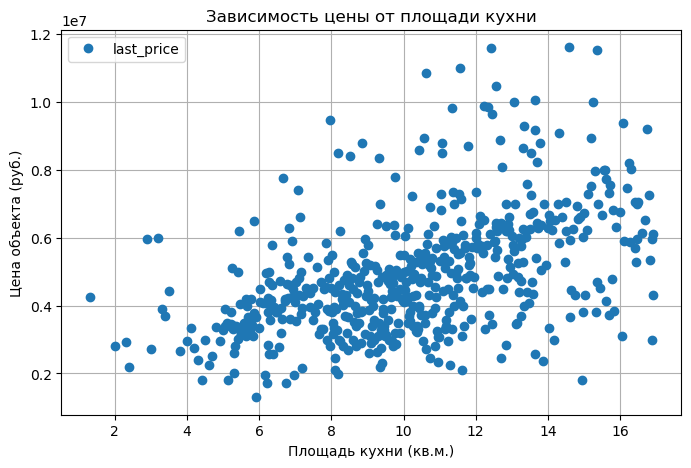

In [69]:
df_outliers.pivot_table(index='kitchen_area', values='last_price')\
.plot(grid=True, style='o', figsize=(8, 5))
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни (кв.м.)')
plt.ylabel('Цена объекта (руб.)')
plt.show()

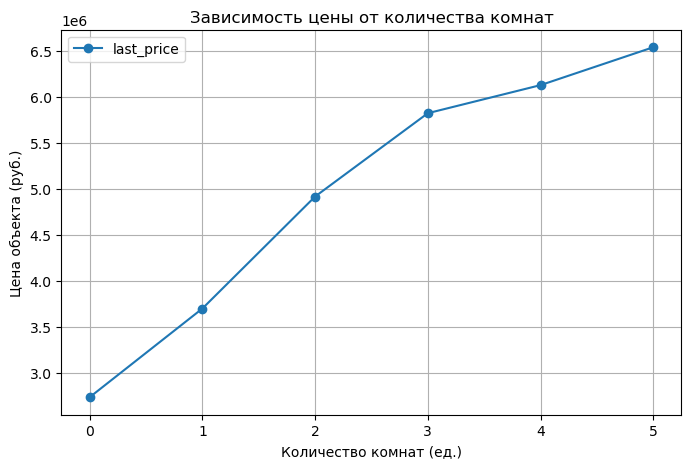

In [70]:
df_outliers.pivot_table(index='rooms', values='last_price')\
.plot(grid=True, style='o-', figsize=(8, 5))
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат (ед.)')
plt.ylabel('Цена объекта (руб.)')
plt.show()

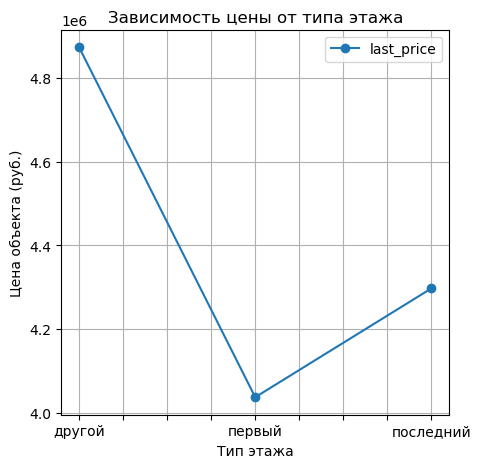

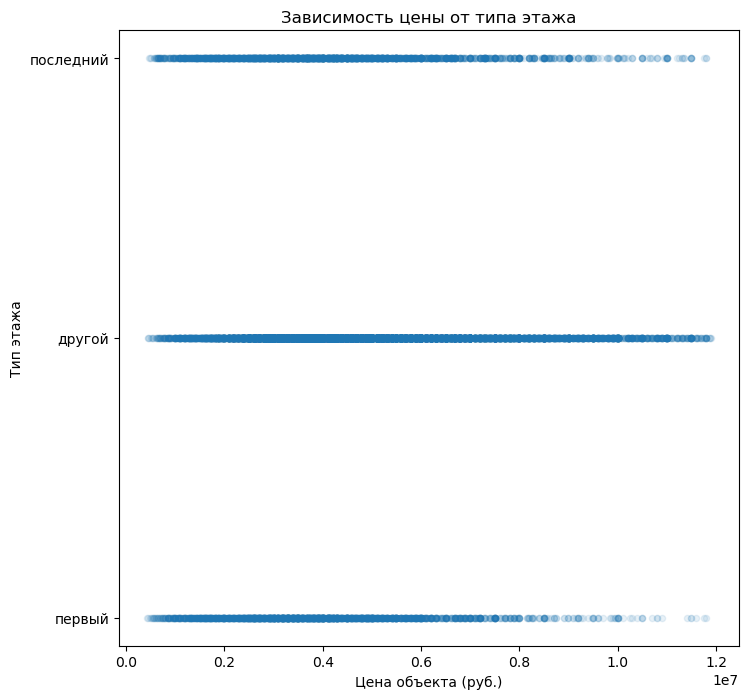

In [71]:
df_outliers.pivot_table(index='type_apartment_floor', values='last_price')\
.plot(grid=True, style='o-', figsize=(5,5))
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена объекта (руб.)')
plt.show()
df_outliers.plot(x='last_price', y='type_apartment_floor', kind='scatter', figsize=(8, 8), alpha=0.1)
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Цена объекта (руб.)')
plt.ylabel('Тип этажа')
plt.show()

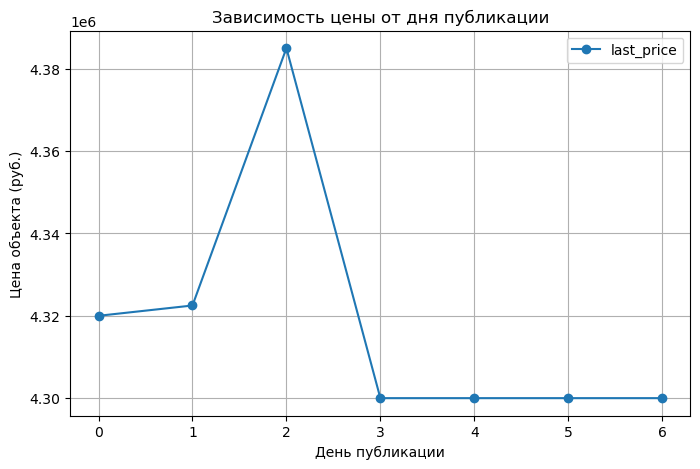

In [72]:
df_outliers.pivot_table(index='day_published', values='last_price', aggfunc='median')\
.plot(grid=True, style='o-', figsize=(8, 5))
plt.title('Зависимость цены от дня публикации')
plt.xlabel('День публикации')
plt.ylabel('Цена объекта (руб.)')
plt.show()

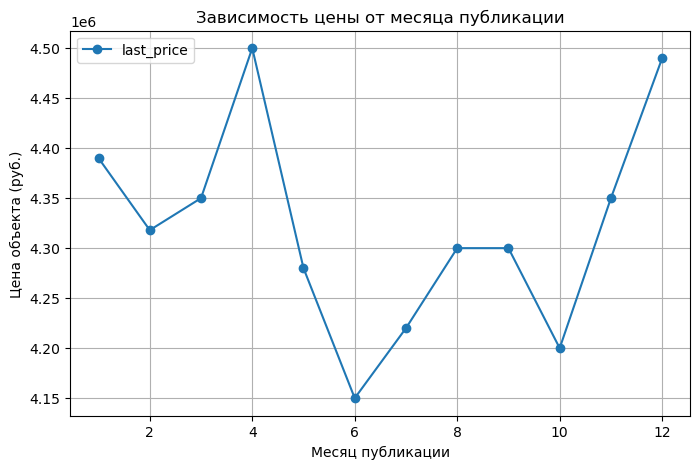

In [73]:
df_outliers.pivot_table(index='month_published', values='last_price', aggfunc='median')\
.plot(grid=True, style='o-', figsize=(8, 5))
plt.title('Зависимость цены от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена объекта (руб.)')
plt.show()

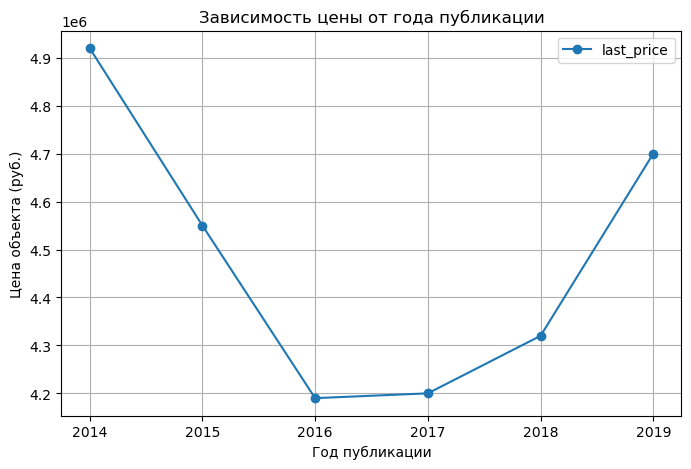

In [74]:
df_outliers.pivot_table(index='year_published', values='last_price', aggfunc='median')\
.plot(grid=True, style='o-', figsize=(8, 5))
plt.title('Зависимость цены от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Цена объекта (руб.)')
plt.show()

<div class="alert alert-info"> <b>Вывод:</b>
    
Определены параметры, которые больше всего влияют на общую (полную) стоимость объекта:

- Чем больше квадратура (общая площадь,жилая площадь), тем выше стоимость. Корреляция этих параметров довольно существенная.
- Число комнат влияет на цену, однако зависимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами. Также это могут быть лофты с большим единым пространством.
- Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже самые дешевые. Немного дороже последний этаж. 
- Зависимость цены от даты размещения выявилась только в разрезе по годам публикации. Наблюдался явный спад период с 2014 по 2016 года (вероятно это было связано с кризисом в экономике).
</div>

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

**Посчитаем количество объявлений по населенным пунктам с помощью `'pivot_table'`. Выберем 10 с наибольшим количеством объявлений. Далее добавим к сводной таблице столбец со значеним стоимости квадратного метра.**

In [75]:
df_sq_m_10 = df.pivot_table(index='locality_name', values='price_one_square_meter', aggfunc=['count'])
df_sq_m_10.columns = ['count']
df_sq_m_10 = df_sq_m_10.sort_values('count', ascending=False).head(10)
df_sq_m_10['price_one_square_meter'] = df.pivot_table(index='locality_name', values='price_one_square_meter')
df_sq_m_10.sort_values('price_one_square_meter', ascending=False)


,count,price_one_square_meter
locality_name,,
санкт-петербург,15721,114849.008793
пушкин,369,103125.819377
деревня кудрово,299,92473.547559
поселок парголово,327,90175.913089
поселок мурино,556,85681.762572
поселок шушары,440,78677.364318
колпино,338,75424.579112
гатчина,307,68746.146515
всеволожск,398,68654.473970


In [76]:
df.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
санкт-петербург,15721,5500000.0
поселок мурино,556,3400000.0
поселок шушары,440,3950000.0
всеволожск,398,3450000.0
пушкин,369,5180000.0
колпино,338,3600000.0
поселок парголово,327,4100000.0
гатчина,307,3100000.0
деревня кудрово,299,3790000.0


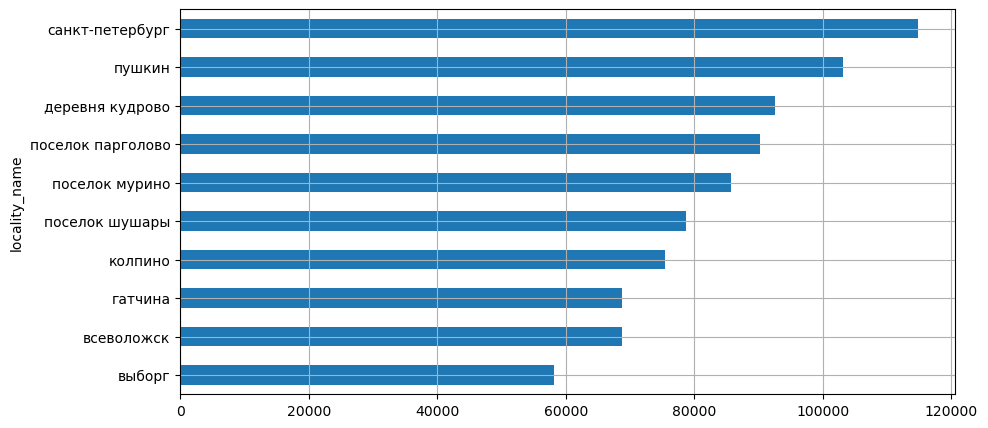

In [77]:
df_sq_m_10['price_one_square_meter'].sort_values(ascending=True)\
.plot(grid=True, kind='barh', figsize=(10, 5))
plt.show()

**Вывод:** 

Самая высокая стоимость квадратного метра жилья ожидаемо в городе Санкт-Петербурге. На втором месте стоит г. Пушкин (бывшее Царское село), который является городом в составе Пушкинского района города федерального значения Санкт-Петербурга, а также он включён в список памятников, охраняемых ЮНЕСКО. Далее идут по стоимости поселения (Кудрово, Парголово, Колпино, Шушары) - это либо внутригородские муниципальные образования либо ближние пригороды Санкт-Петербурга. На последнем месте в топ-10 стоит г. Выборг, который располагаетя на расстоянии более 100 км от Санкт-Петербурга.

### Изучим зависимость стоимости объектов от расстояния до центра Санкт-Петербурга. Построим график изменения средней цены для каждого километра от центра Санкт-Петербурга.

**Получим числовое описание данных столбца `'locality_name == "санкт-петербург'` методом `'describe()'`.**

In [78]:
df.query('locality_name == "санкт-петербург"')['distance_to_city_center'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_to_city_center, dtype: float64

**Построим графики и таблицу (с данными по каждому километру), которые покажут зависимость средней цены для каждого километра от центра Санкт-Петербурга.**

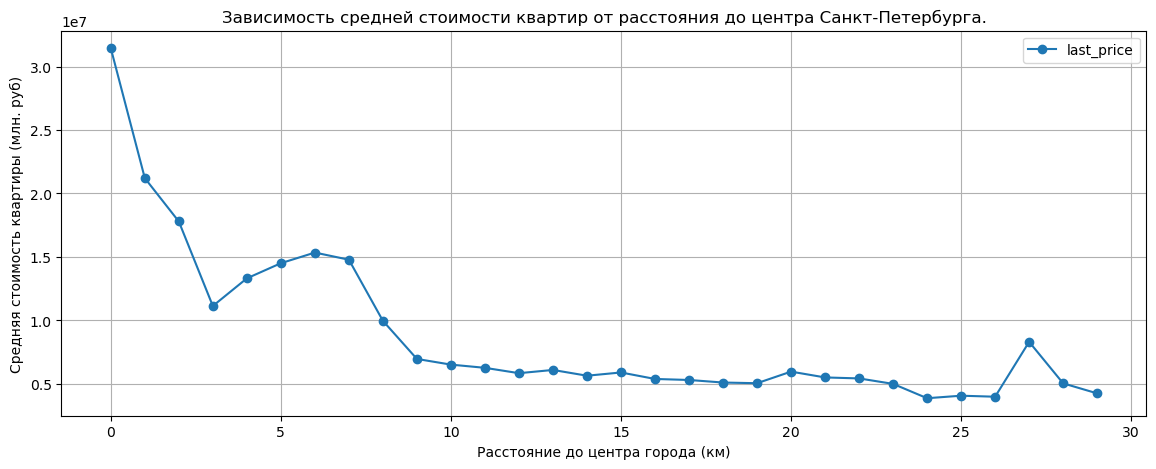

In [79]:
df.query('locality_name == "санкт-петербург"')\
.pivot_table(index='distance_to_city_center', values='last_price')\
.plot(grid=True, style='o-', figsize=(14, 5))
plt.title('Зависимость средней стоимости квартир от расстояния до центра Санкт-Петербурга.')
plt.xlabel('Расстояние до центра города (км)')
plt.ylabel('Средняя стоимость квартиры (млн. руб)')
plt.show()

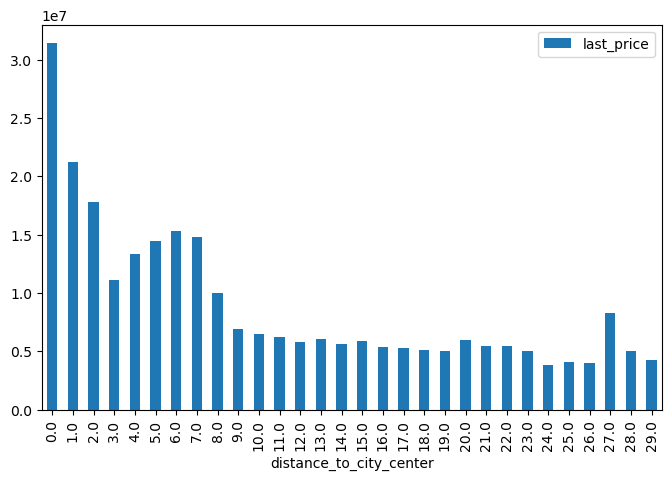

In [80]:
df.query('locality_name == "санкт-петербург"')\
.pivot_table(index='distance_to_city_center',
             values='last_price',
             aggfunc='mean').plot(kind='bar', figsize=(8, 5))
plt.show()

In [81]:
df.query('locality_name == "санкт-петербург"')\
.pivot_table(index='distance_to_city_center', values='last_price')


,last_price
distance_to_city_center,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


**Вывод:** 

Как и следовало ожидать самая дорогая недвижимость в радиусе 1 км от центра города.
Далее до 7 км недвижимость снижается в цене, но все ещё остается довольно-таки высокой.
С 8 по 29 км стоимость недвижимости "плавает" в диапазоне от 4 млн.руб до 7 млн.руб. Единственная аномальная цена на 27 км, которая близка к цене на 8 км от центра города.


## Итоговый вывод.

<div class="alert alert-info">
    Было проведено исследование данных сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
    
**Изучили общую информацию о данных**
- Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных. 
- По гистограммам видно, что в данных есть аномальные значения. Явные дубликаты отсутствуют. 
- Данные признаны полными идостаточными для исследования.
    
**В процессе предобработки данных было сделано следующее:**
- Переименованы названия столбцов cityCenters_nearest на city_centers_nearest,
'parks_around3000' на 'parks_around_3000','ponds_around3000' на 'ponds_around_3000'.
- Заполнены пропущенные значения в таблице для некоторых параметров датафрейма.
- Изменены типы данных, в соответствии с данными находяшимися в столбцах.
- Проведена работа с неявными дубликатами.
    
**Добавили в таблицу новые столбцы:** 
- цена одного квадратного метра  `' price_one_square_meter'`
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)  `' day_published'`
- месяц публикации объявления  `' month_published'`
- год публикации объявления  `' year_published'`    
- тип этажа квартиры (значения — «первый», «последний», «другой»)  `'type_apartment_floor'`    
- расстояние до центра города в километрах  `'distance_to_city_center'`
    
**Провели исследовательский анализ**
    
***Изучили ряд параметров объектов и построли отдельные гистограммы для каждого из этих параметров:***
* На основании изученных параметров нарисовали "типичный портрет" квартиры: общей площадью около 50 кв. м., с кухней от 6 кв.м., жилой площадью больше 20 кв.м. , стоимостью около 4 млн.руб с высотой потолков 2,65 метра в пятиэтажном доме, расположенном в спальном районе города.
    
***Изучили, как быстро продавались квартиры:***
* Cреднее время продажи квартиры составляет 181 день - это около полугода. А медианное значение составляет 95 дней. Такая   разница объясняется длинным хвостом из продаж квартир, которые продавались от трех лет. Возможно люди не снимали объявления, а продажи квартир уже не велись (то есть вполне возможно здесь имеет место быть недоработка программного обеспечения). 
* Также наблюдаются интересные пики в продажах 45 дней, 60 дней, 90 дней. Возможно эти объявления снимались из-за неоплаты продавцом платного размещения.
* Определили, что быстрые продажи до 95 дней (второй квартиль), а необычно долгие - свыше 512 дней (верхний предел).

***Определили факторы, которые больше всего влияют на общую (полную) стоимость объекта:***
* Чем больше квадратура (общая площадь,жилая площадь), тем выше стоимость. Корреляция этих параметров довольно существенная.
* Число комнат влияет на цену, однако зависимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами.   Также это могут быть лофты с большим единым пространством.
* Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже самые дешевые. Немного дороже       последний этаж. 
* Зависимость цены от даты размещения выявилась только в разрезе по годам публикации. Наблюдался явный спад период с 2014 по     2016 года (вероятно это было связано с кризисом в экономике).
    
***Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.***    
* Самая высокая стоимость квадратного метра жилья ожидаемо в городе Санкт-Петербурге. На втором месте стоит г. Пушкин (бывшее Царское село), который является городом в составе Пушкинского района города федерального значения Санкт-Петербурга, а также он включён в список памятников, охраняемых ЮНЕСКО. 
* Далее идут по стоимости поселения (Кудрово, Парголово, Колпино, Шушары) - это либо внутригородские муниципальные образования либо ближние пригороды Санкт-Петербурга. 
* На последнем месте в топ-10 стоит г. Выборг, который располагаетя на расстоянии более 100 км от Санкт-Петербурга.
    
***Изучили зависимость стоимости объектов от расстояния до центра Санкт-Петербурга.***
* Самая дорогая недвижимость в радиусе 1 км от центра города.
* Далее до 7 км недвижимость снижается в цене, но все ещё остается довольно-таки высокой.
* С 8 по 29 км стоимость недвижимости "плавает" в диапазоне от 4 млн.руб до 7 млн.руб. 
* Единственная аномальная цена на 27 км, которая близка к цене на 8 км от центра города.